In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import os
import json
import numpy as np
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sys
import module_extraction
import clustering
from module_extraction_ortho import Filters, Modules

分析対象の指定

In [32]:
# -- 個別画像 --
#input_img_path = '../ModuleExtraction/hokuto/thermal/DJI_0123_R.JPG'
#thermal_npdat_path = "../ModuleExtraction/hokuto/thermal"

# --オルソ画像 --
#input_img_path = 'images/ortho/izuka.tif' # failed
#input_img_path = './images/ortho/chiba.tif'

#input_img_path = 'images/ortho/1391.tif'
#input_img_path = 'images/ortho/1477.tif' # fair
input_img_path = 'images/ortho/1466.tif'
#input_img_path = 'images/ortho/1480.tif' # failed

#input_img_path = 'images/ortho/1411.tif' #fair
#input_img_path = 'images/ortho/1481.tif'
#input_img_path = 'images/ortho/1441.tif' # failded
#input_img_path = 'images/ortho/1473.tif' #failed

In [33]:
#output_dir_path = "./outputs/"+input_img_path.split("/")[-1][:-4]
output_dir_path = "./outputs/"+"test"
print(output_dir_path)
os.makedirs(output_dir_path,exist_ok=True)

./outputs/test


フィルタの適用

In [34]:
#filters = Filters(thermal_npdat_path)
filters = Filters()

In [35]:
img_org = cv2.imread(input_img_path, 0)

/Users/tnozawa/afterFIT/work/rule_based_anomaly_detection/module_extraction.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


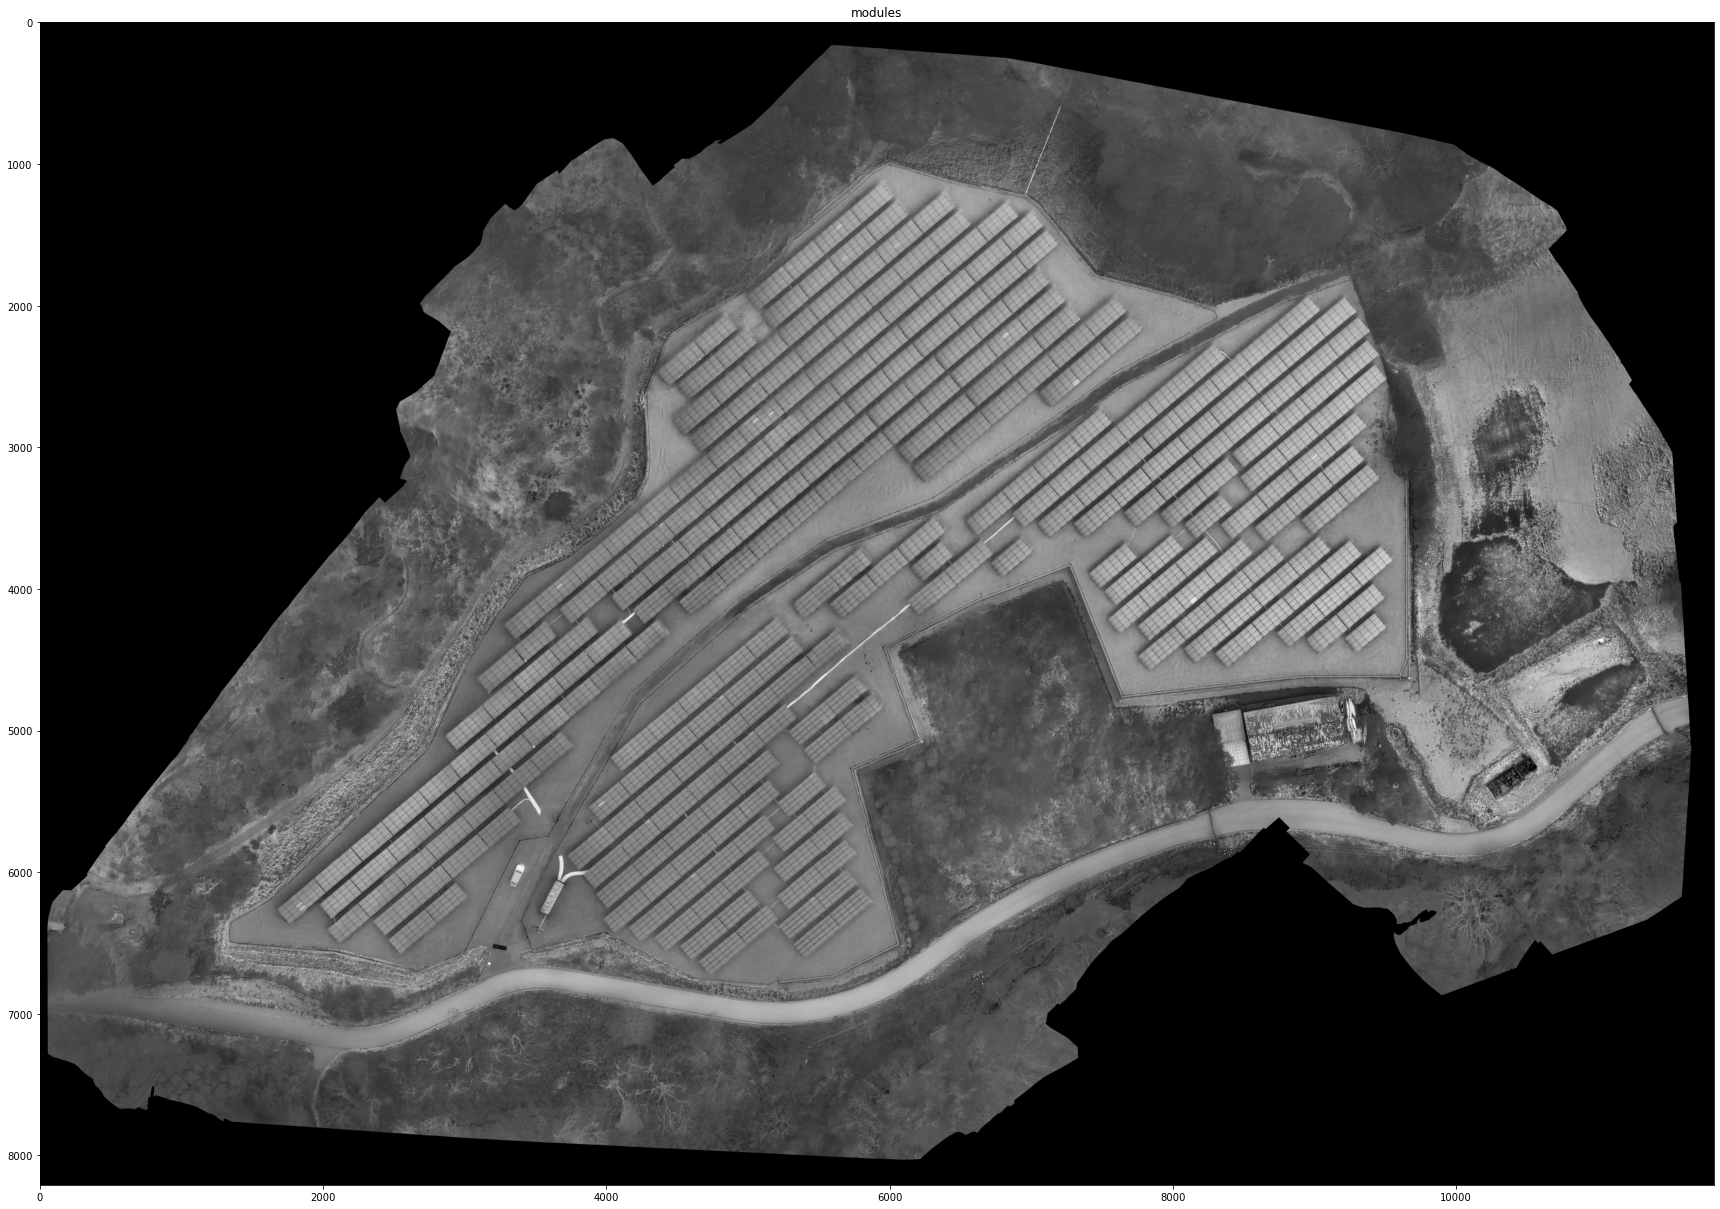

In [36]:
# 元画像
module_extraction.show_img({"modules":img_org},cmap="gray",figsize=(30,30))

In [37]:
# 部分抽出
#img_cut = img_org[6000-1000: 6000+1000, 6000-1000: 6000+1000]
#module_extraction.show_img({"modules":img_cut},cmap="gray",figsize=(30,30))

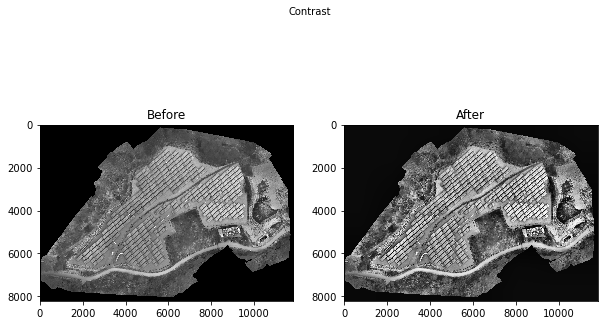

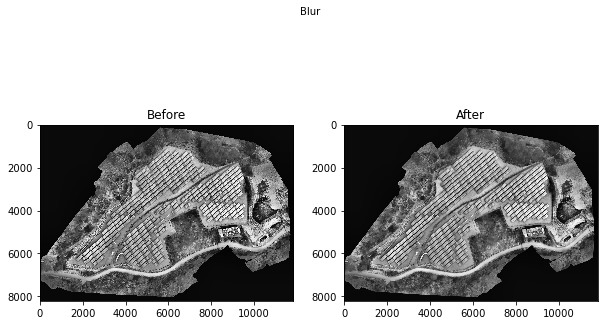

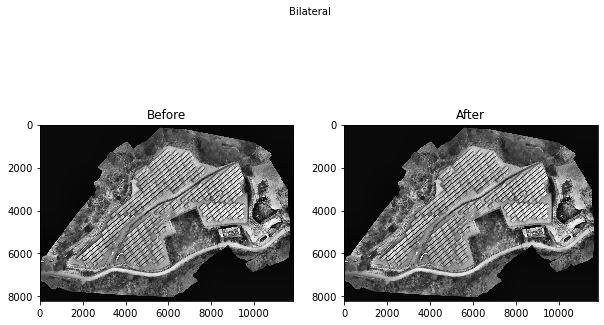

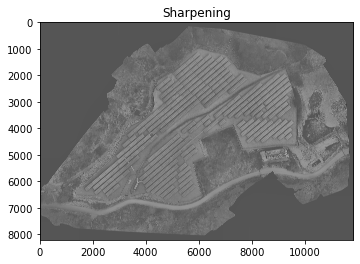

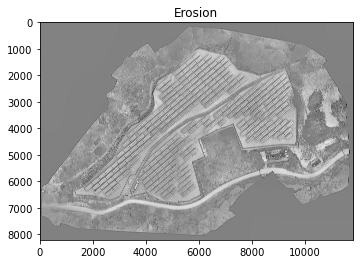

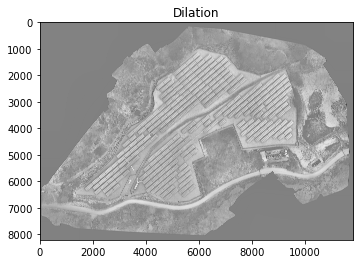

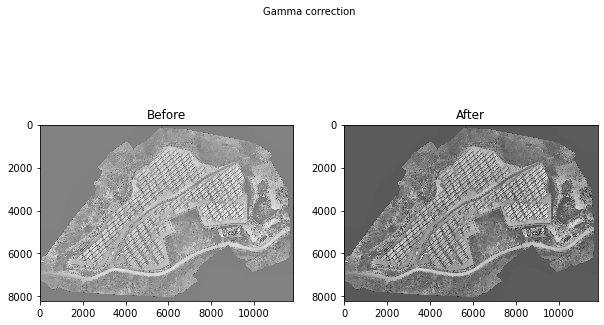

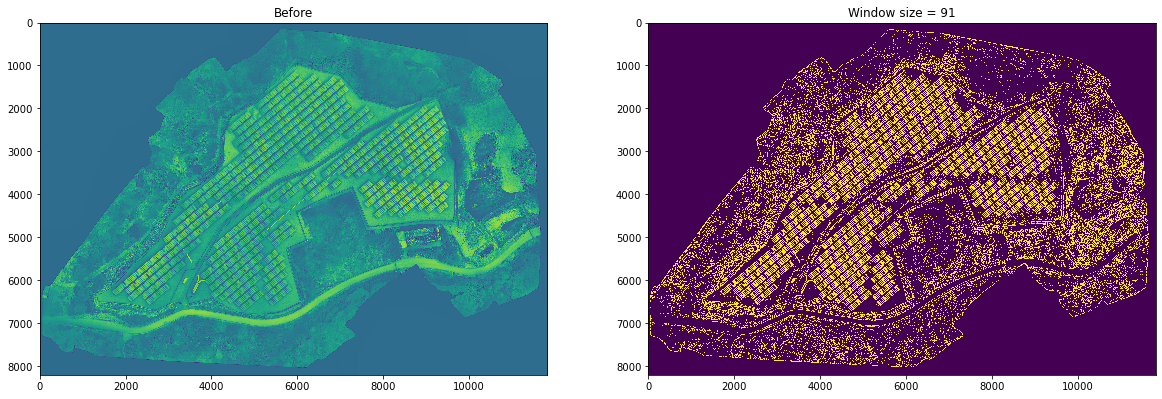

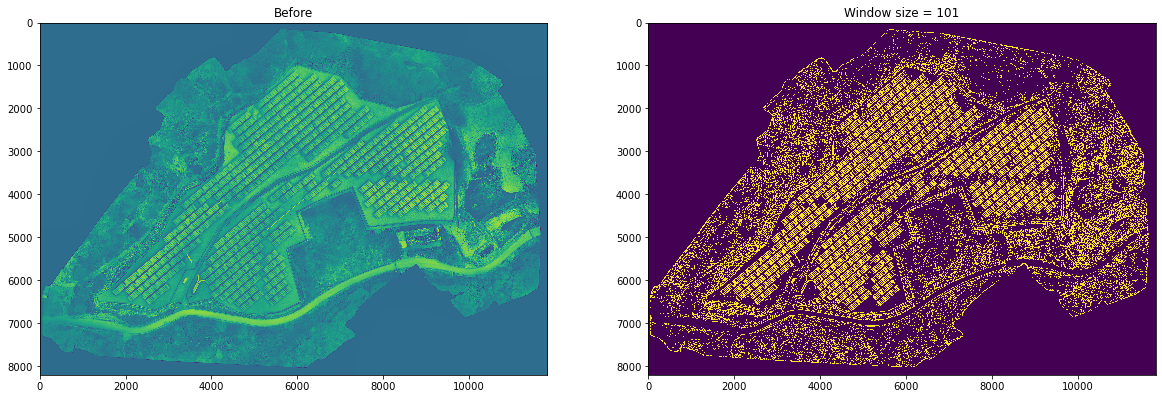

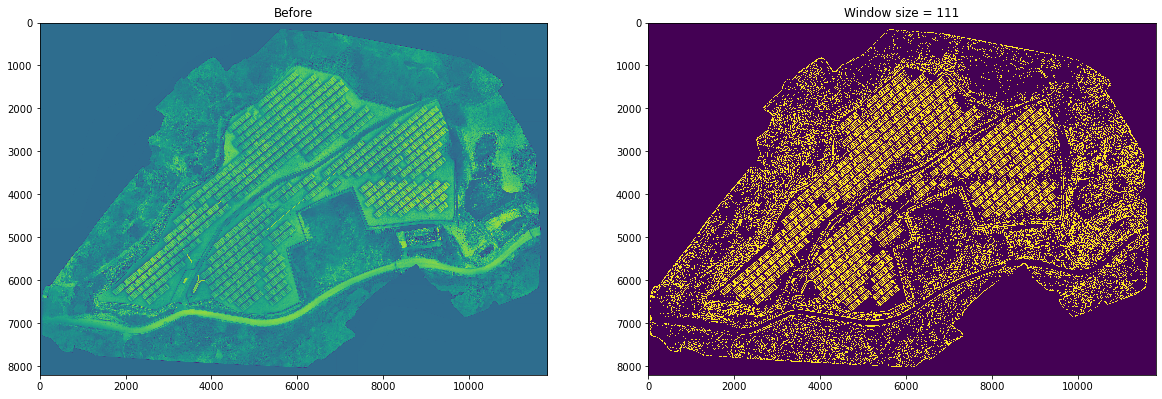

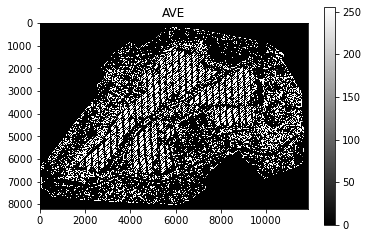

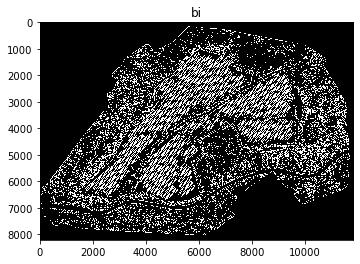

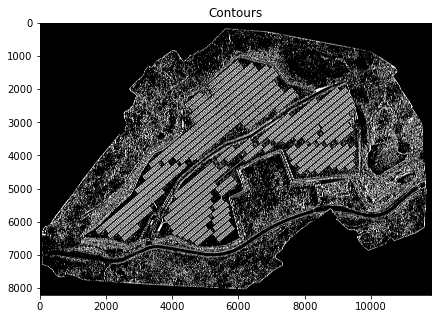

In [38]:
# 前処理
candidate_module_contours = filters.get_module_contours(img_org)

In [39]:
# モジュール抽出画像
img_con = cv2.drawContours(np.zeros_like(img_org), candidate_module_contours, -1, 255, -1)
img_mask = cv2.bitwise_and(img_org, img_con)

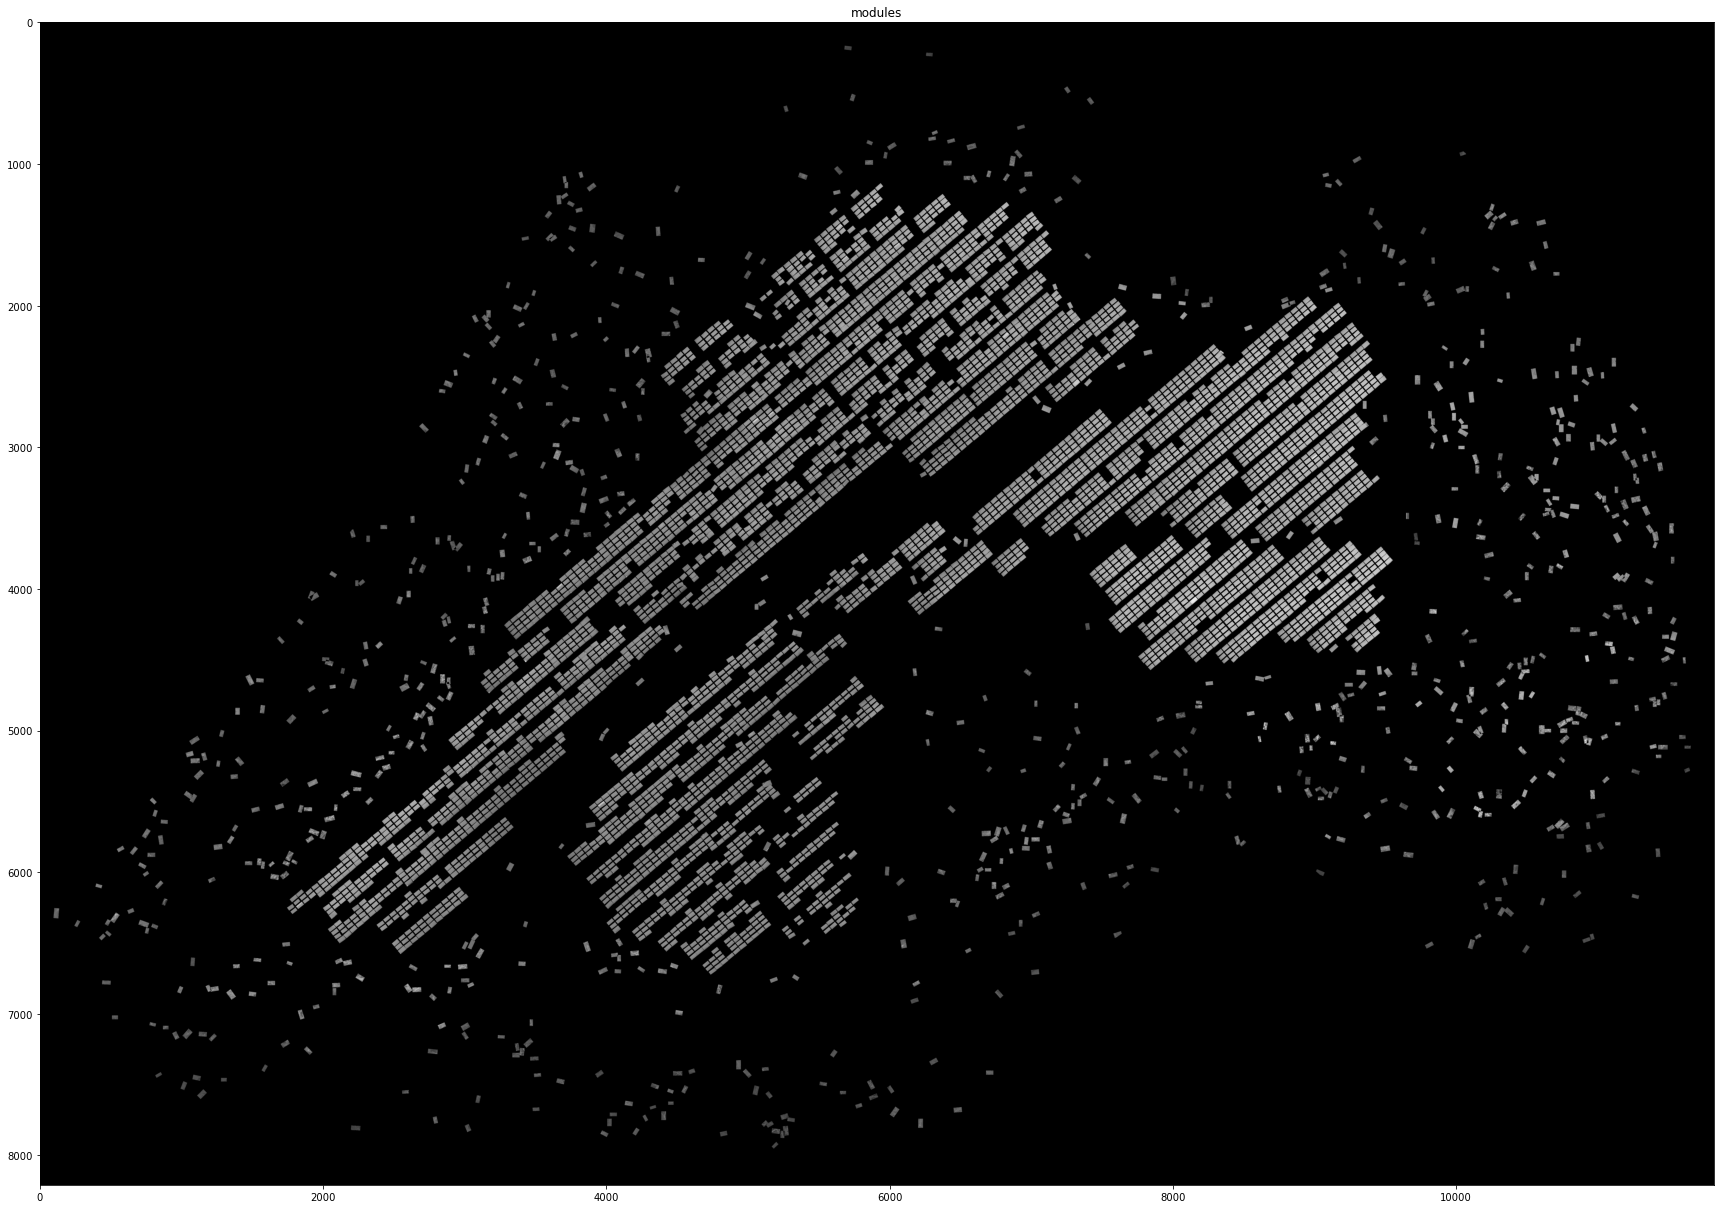

In [40]:
module_extraction.show_img({"modules":img_mask},cmap="gray",figsize=(30,30))

In [41]:
img_write = cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB)
cv2.imwrite(output_dir_path+'/img_mask_index_no_dbscan.png',img_write)

True

モジュールのクラスタリング

In [42]:
import clustering
modules = Modules(candidate_module_contours)
module_labels = modules.get_dbscan_labels(candidate_module_contours, eps=1.25)

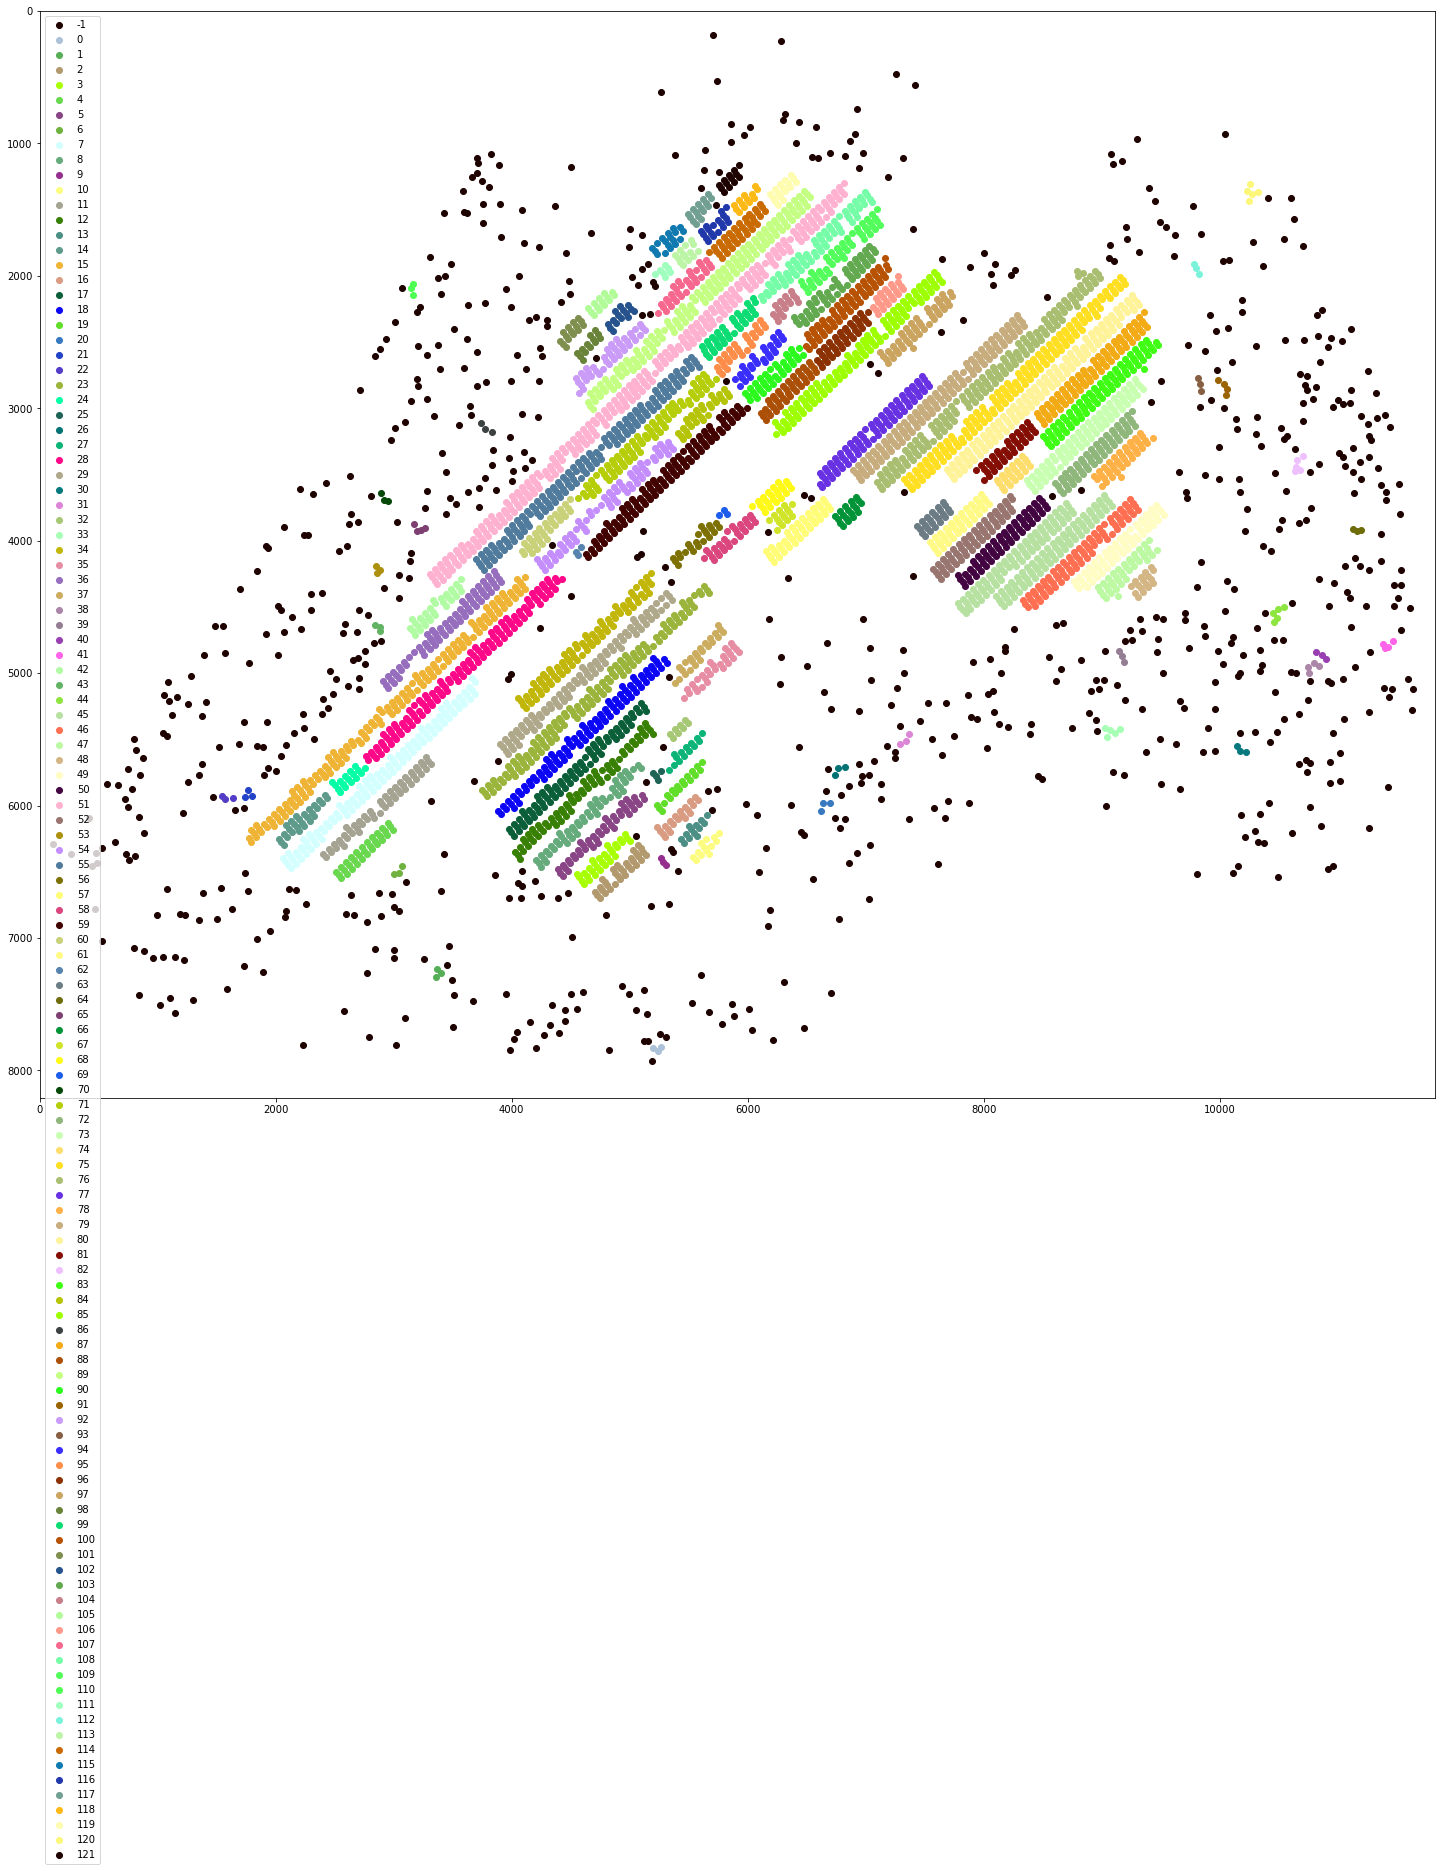

In [43]:
fig, ax = plt.subplots(facecolor="w", figsize=(25,20))
#cmap = plt.get_cmap("tab20")
colors = list(matplotlib.colors.XKCD_COLORS.items())[:max(module_labels)+1]
module_centers = np.array( [c.mean(axis=0) for c in candidate_module_contours] )
for i in range(-1,max(module_labels)+1):
    data = module_centers[module_labels == i]
    plt.scatter(data[:, 0], data[:, 1], color=colors[i][1], label=str(i))
#plt.scatter(module_centers[:, 0], module_centers[:, 1], color=cmap(module_labels+1), label=)
ax.legend(loc='upper left')
ax.set_xlim([0, img_con.shape[1]])
ax.set_ylim([img_con.shape[0], 0])
plt.show()

出現頻度の高いラベルのみを残す

In [44]:
from collections import Counter
counter = Counter(module_labels)

In [45]:
counter.most_common

<bound method Counter.most_common of Counter({-1: 756, 51: 286, 45: 174, 15: 161, 76: 159, 55: 157, 75: 157, 89: 157, 80: 144, 23: 133, 79: 130, 28: 129, 7: 121, 85: 117, 59: 109, 18: 99, 29: 95, 34: 89, 73: 87, 83: 87, 71: 86, 77: 84, 87: 84, 17: 83, 46: 83, 12: 72, 36: 72, 54: 72, 108: 71, 49: 66, 50: 66, 100: 64, 52: 62, 72: 61, 11: 55, 8: 54, 103: 53, 109: 50, 97: 48, 5: 46, 57: 46, 61: 44, 88: 42, 78: 41, 81: 41, 92: 41, 47: 40, 96: 40, 90: 39, 114: 39, 99: 38, 60: 34, 2: 33, 4: 33, 107: 33, 3: 31, 42: 31, 84: 30, 95: 30, 35: 29, 58: 29, 94: 29, 14: 28, 37: 24, 63: 24, 68: 24, 74: 24, 106: 23, 56: 22, 16: 21, 19: 19, 66: 19, 115: 18, 116: 18, 24: 17, 48: 17, 104: 17, 119: 17, 117: 16, 67: 15, 101: 15, 102: 15, 27: 14, 105: 14, 113: 14, 10: 13, 13: 13, 98: 13, 118: 13, 121: 13, 32: 8, 111: 7, 33: 5, 44: 5, 82: 5, 120: 5, 25: 4, 38: 4, 41: 4, 65: 4, 91: 4, 0: 3, 1: 3, 6: 3, 9: 3, 20: 3, 22: 3, 21: 3, 26: 3, 30: 3, 31: 3, 39: 3, 40: 3, 43: 3, 53: 3, 62: 3, 64: 3, 69: 3, 70: 3, 86: 3,

In [46]:
#array_labels = np.array([i for (i, count) in counter.most_common() if i>0 and count>20])
array_labels = np.array([i for (i, count) in counter.most_common() if i>0 and count>10])
module_flags = [label in array_labels for label in module_labels]

In [47]:
module_centers.shape

(6093, 2)

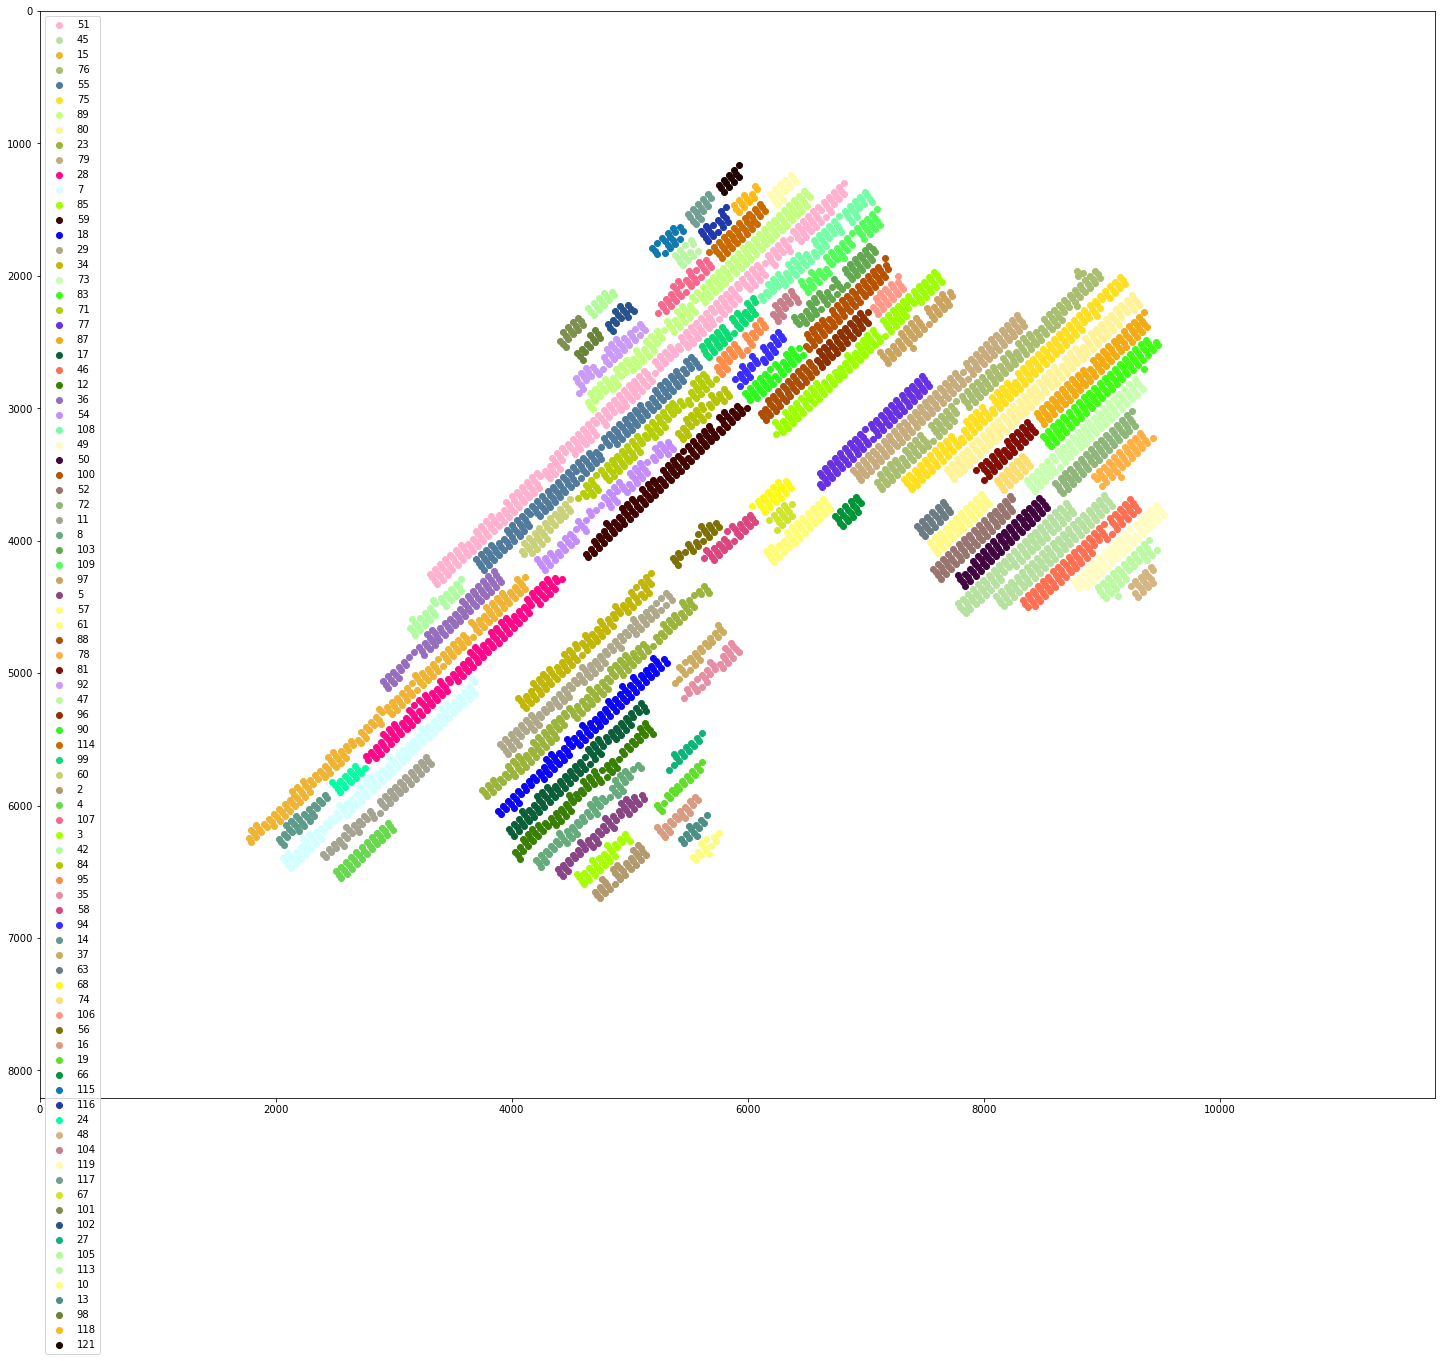

In [48]:
fig, ax = plt.subplots(facecolor="w", figsize=(25,20))
for i in array_labels:
        data = module_centers[module_labels == i]
        plt.scatter(data[:, 0], data[:, 1], color=colors[i][1], label=str(i))
ax.legend(loc='upper left')
ax.set_xlim([0, img_con.shape[1]])
ax.set_ylim([img_con.shape[0], 0])
plt.show() 

真のモジュール情報のみを残す

In [49]:
true_module_contours = np.array(candidate_module_contours)[module_flags]
modules = Modules(true_module_contours) # 真のモジュール情報に更新
true_module_labels = modules.get_dbscan_labels(true_module_contours, eps=1.25)

/Users/tnozawa/afterFIT/work/rule_based_anomaly_detection/module_extraction.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


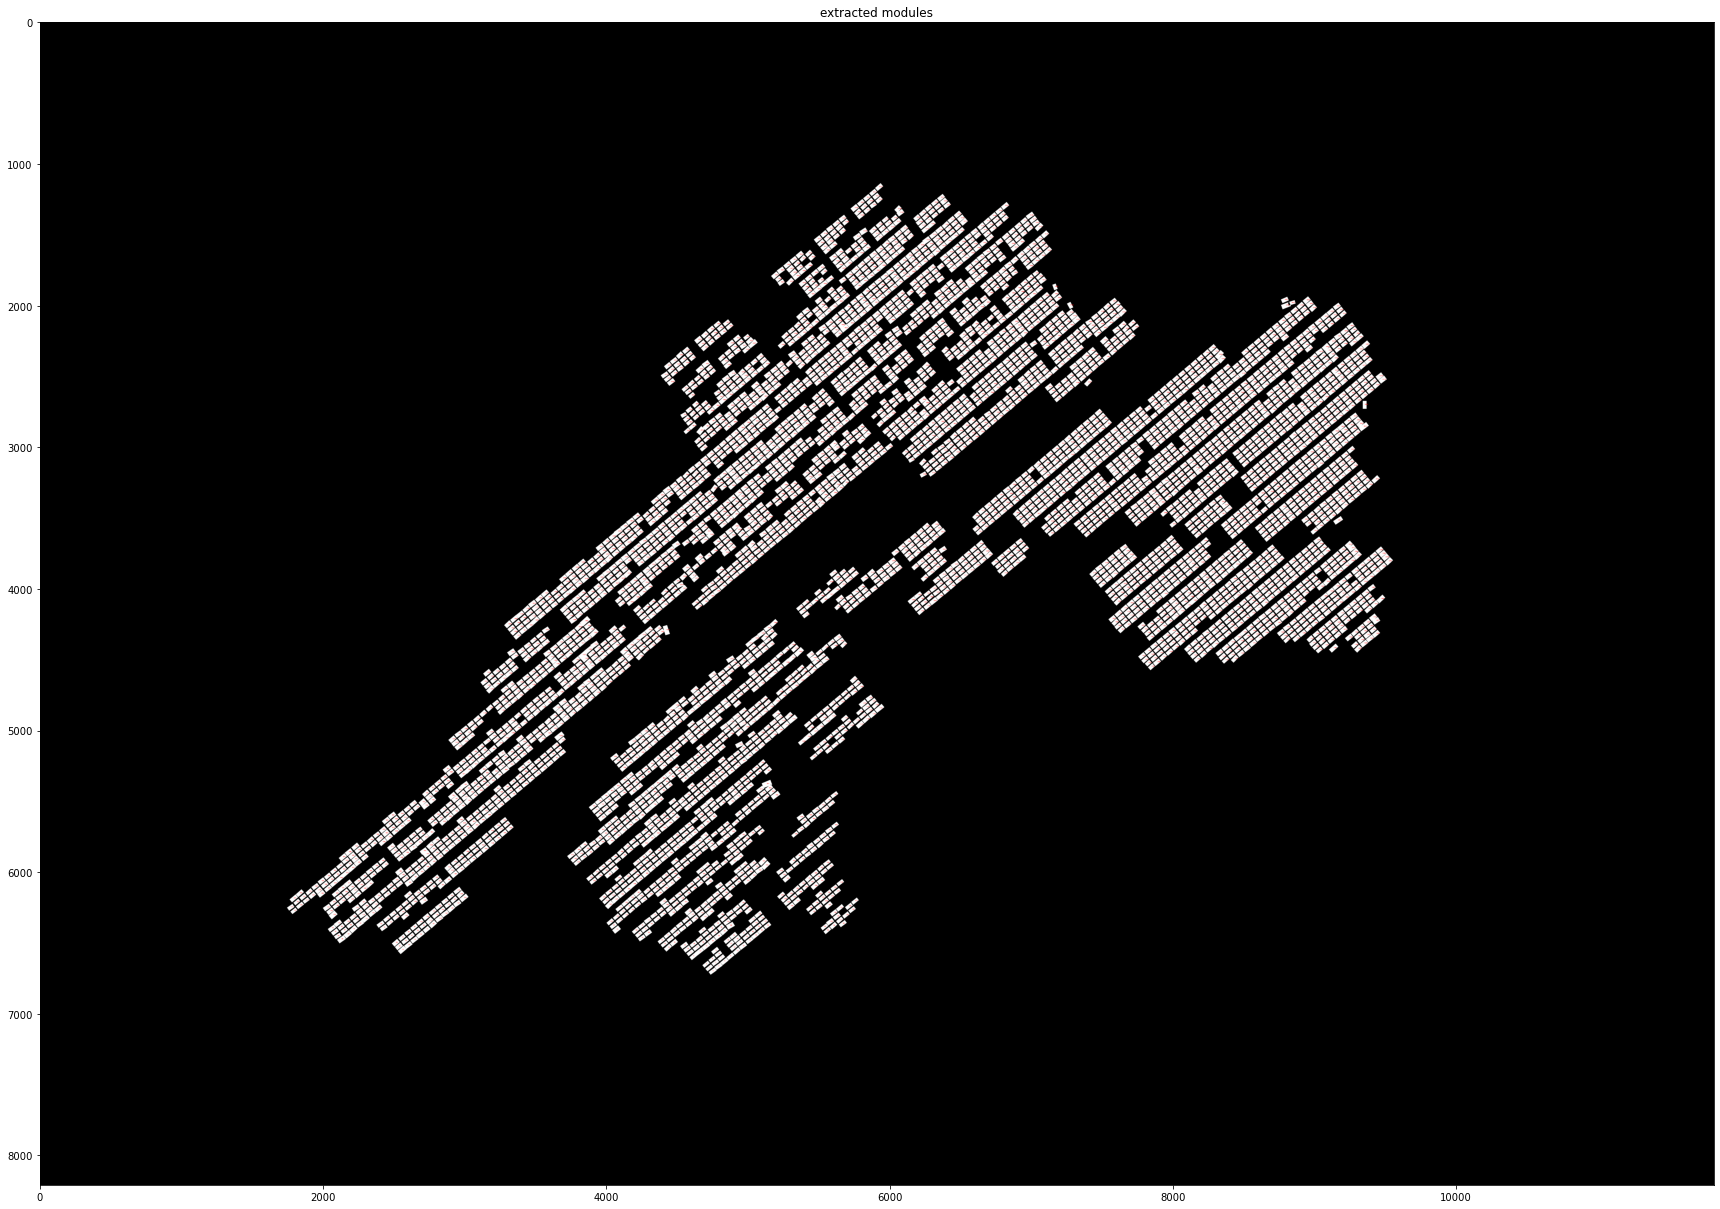

In [50]:
img_con_index = modules.get_img_contours(img_org, index=True)
module_extraction.show_img({"extracted modules":img_con_index},cmap="gray",figsize=(30,30))

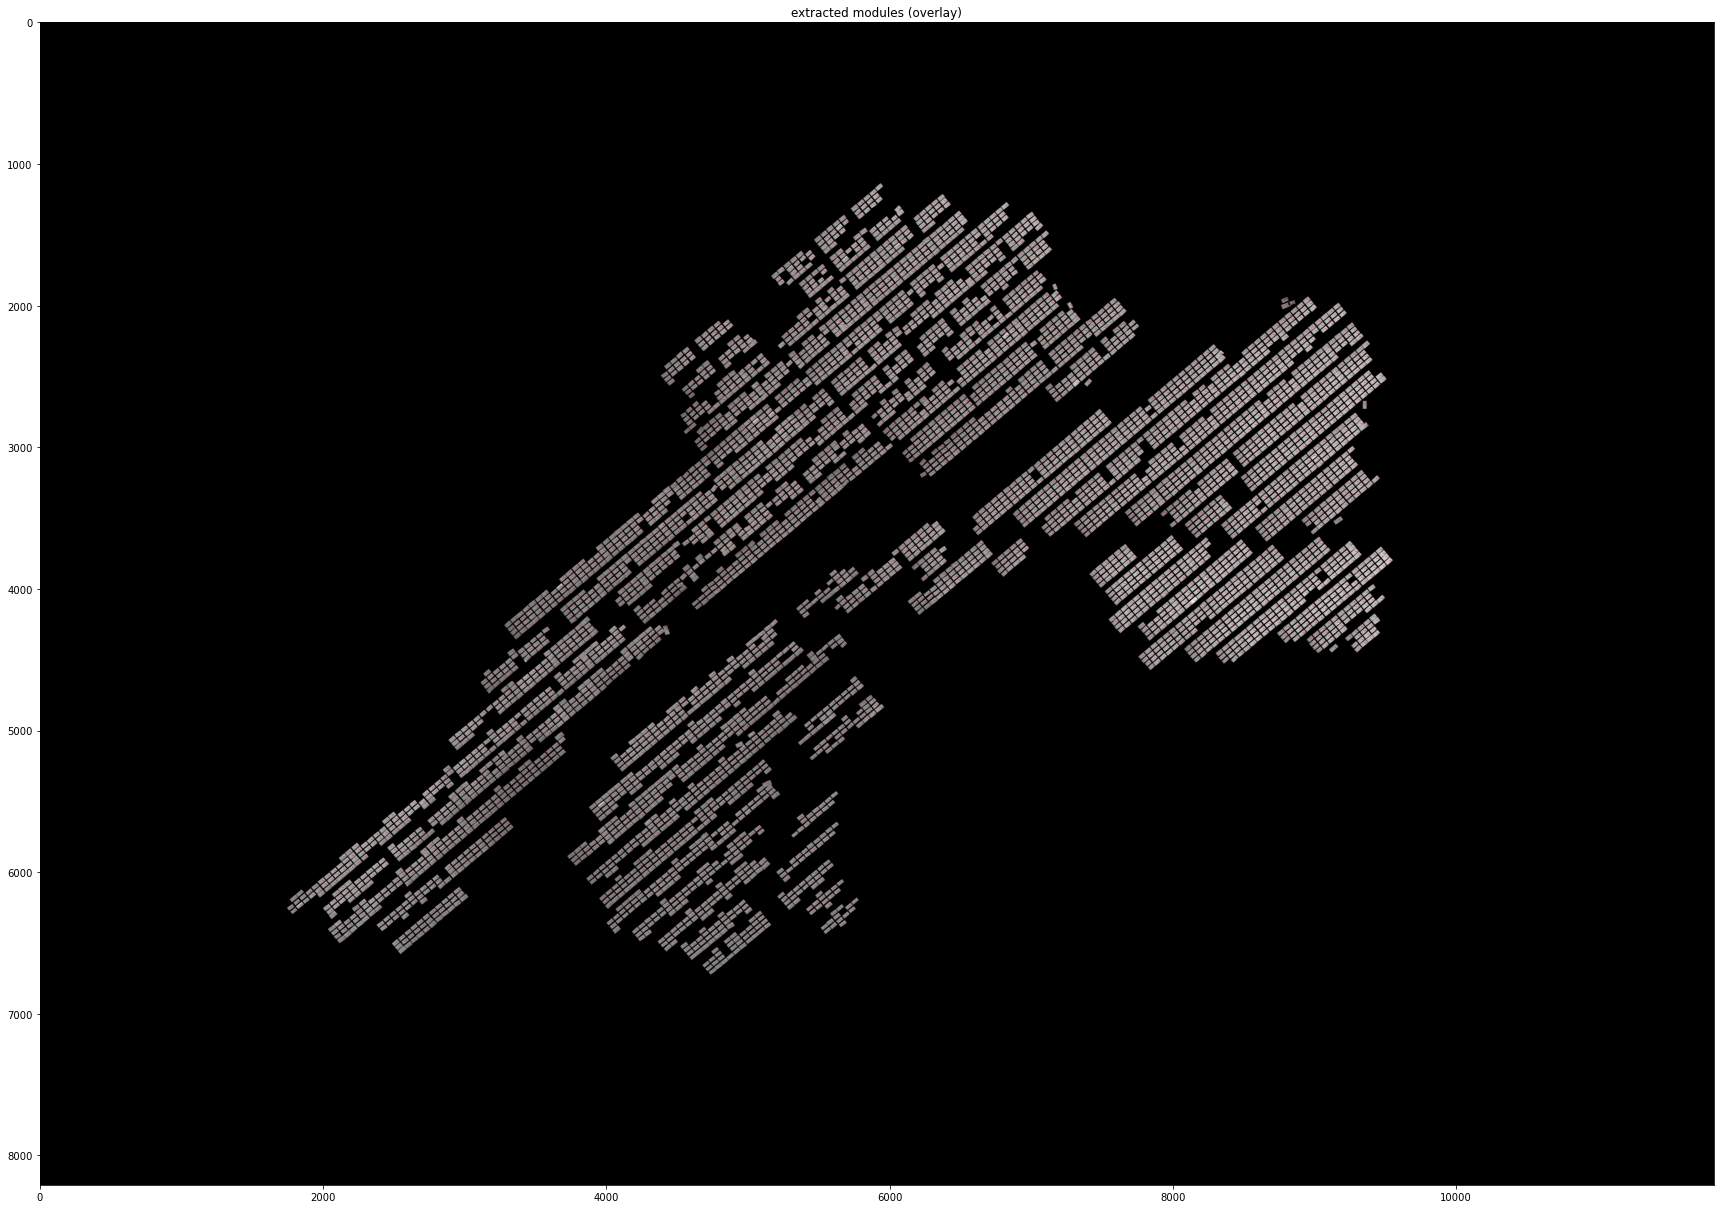

In [51]:
img_con = modules.get_img_contours(img_org, index=False)
img_mask = cv2.bitwise_and(img_org, img_con)
img_mask_index = modules.add_index(img_mask)
module_extraction.show_img({"extracted modules (overlay)":img_mask_index},cmap="gray",figsize=(30,30))

In [52]:
img_write = cv2.cvtColor(img_mask_index, cv2.COLOR_BGR2RGB)
cv2.imwrite(output_dir_path+'/img_mask_index.png',img_write)

True

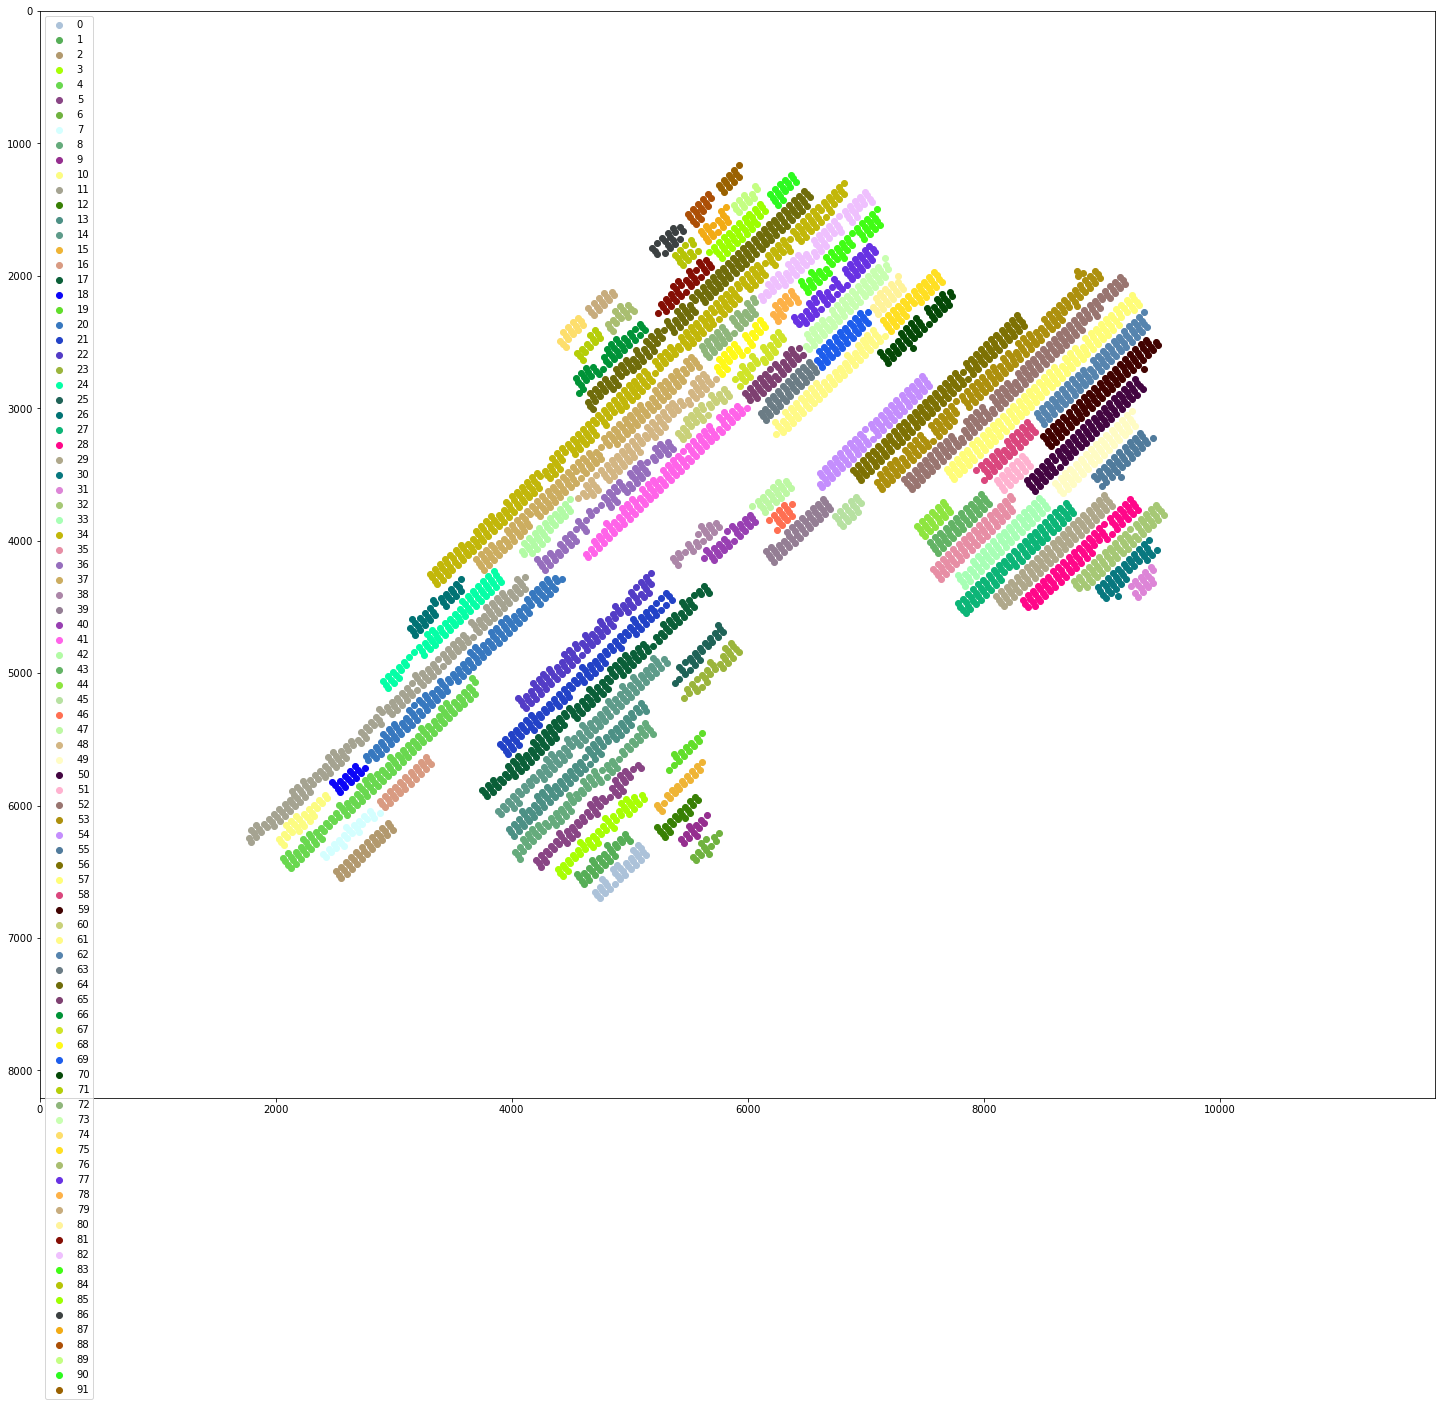

In [53]:
module_centers = np.array( [c.mean(axis=0) for c in true_module_contours] )
fig, ax = plt.subplots(facecolor="w", figsize=(25,20))
for i in range(max(true_module_labels)+1):
    data = module_centers[true_module_labels == i]
    plt.scatter(data[:, 0], data[:, 1], color=colors[i][1], label=str(i))
ax.legend(loc='upper left')
ax.set_xlim([0, img_con.shape[1]])
ax.set_ylim([img_con.shape[0], 0])
plt.show() 

クラスタサイズ調整のための再分割

In [54]:
from sklearn.cluster import KMeans
desired_cluster_size = 20

In [55]:
splitted_module_labels = true_module_labels
for i in range(max(splitted_module_labels)+1):
    # coordinates for target label
    data = module_centers[splitted_module_labels == i]
    if len(data) >= 2*desired_cluster_size:
        # clustering by K-means
        model = KMeans(
            n_clusters = int(len(data)/desired_cluster_size)
        ).fit(data)
        # new labels for target
        new_labels = np.where(model.labels_ > 0, 
                              model.labels_ + max(splitted_module_labels), i)
        # replace with new labels
        splitted_module_labels[np.where(splitted_module_labels == i)] = new_labels

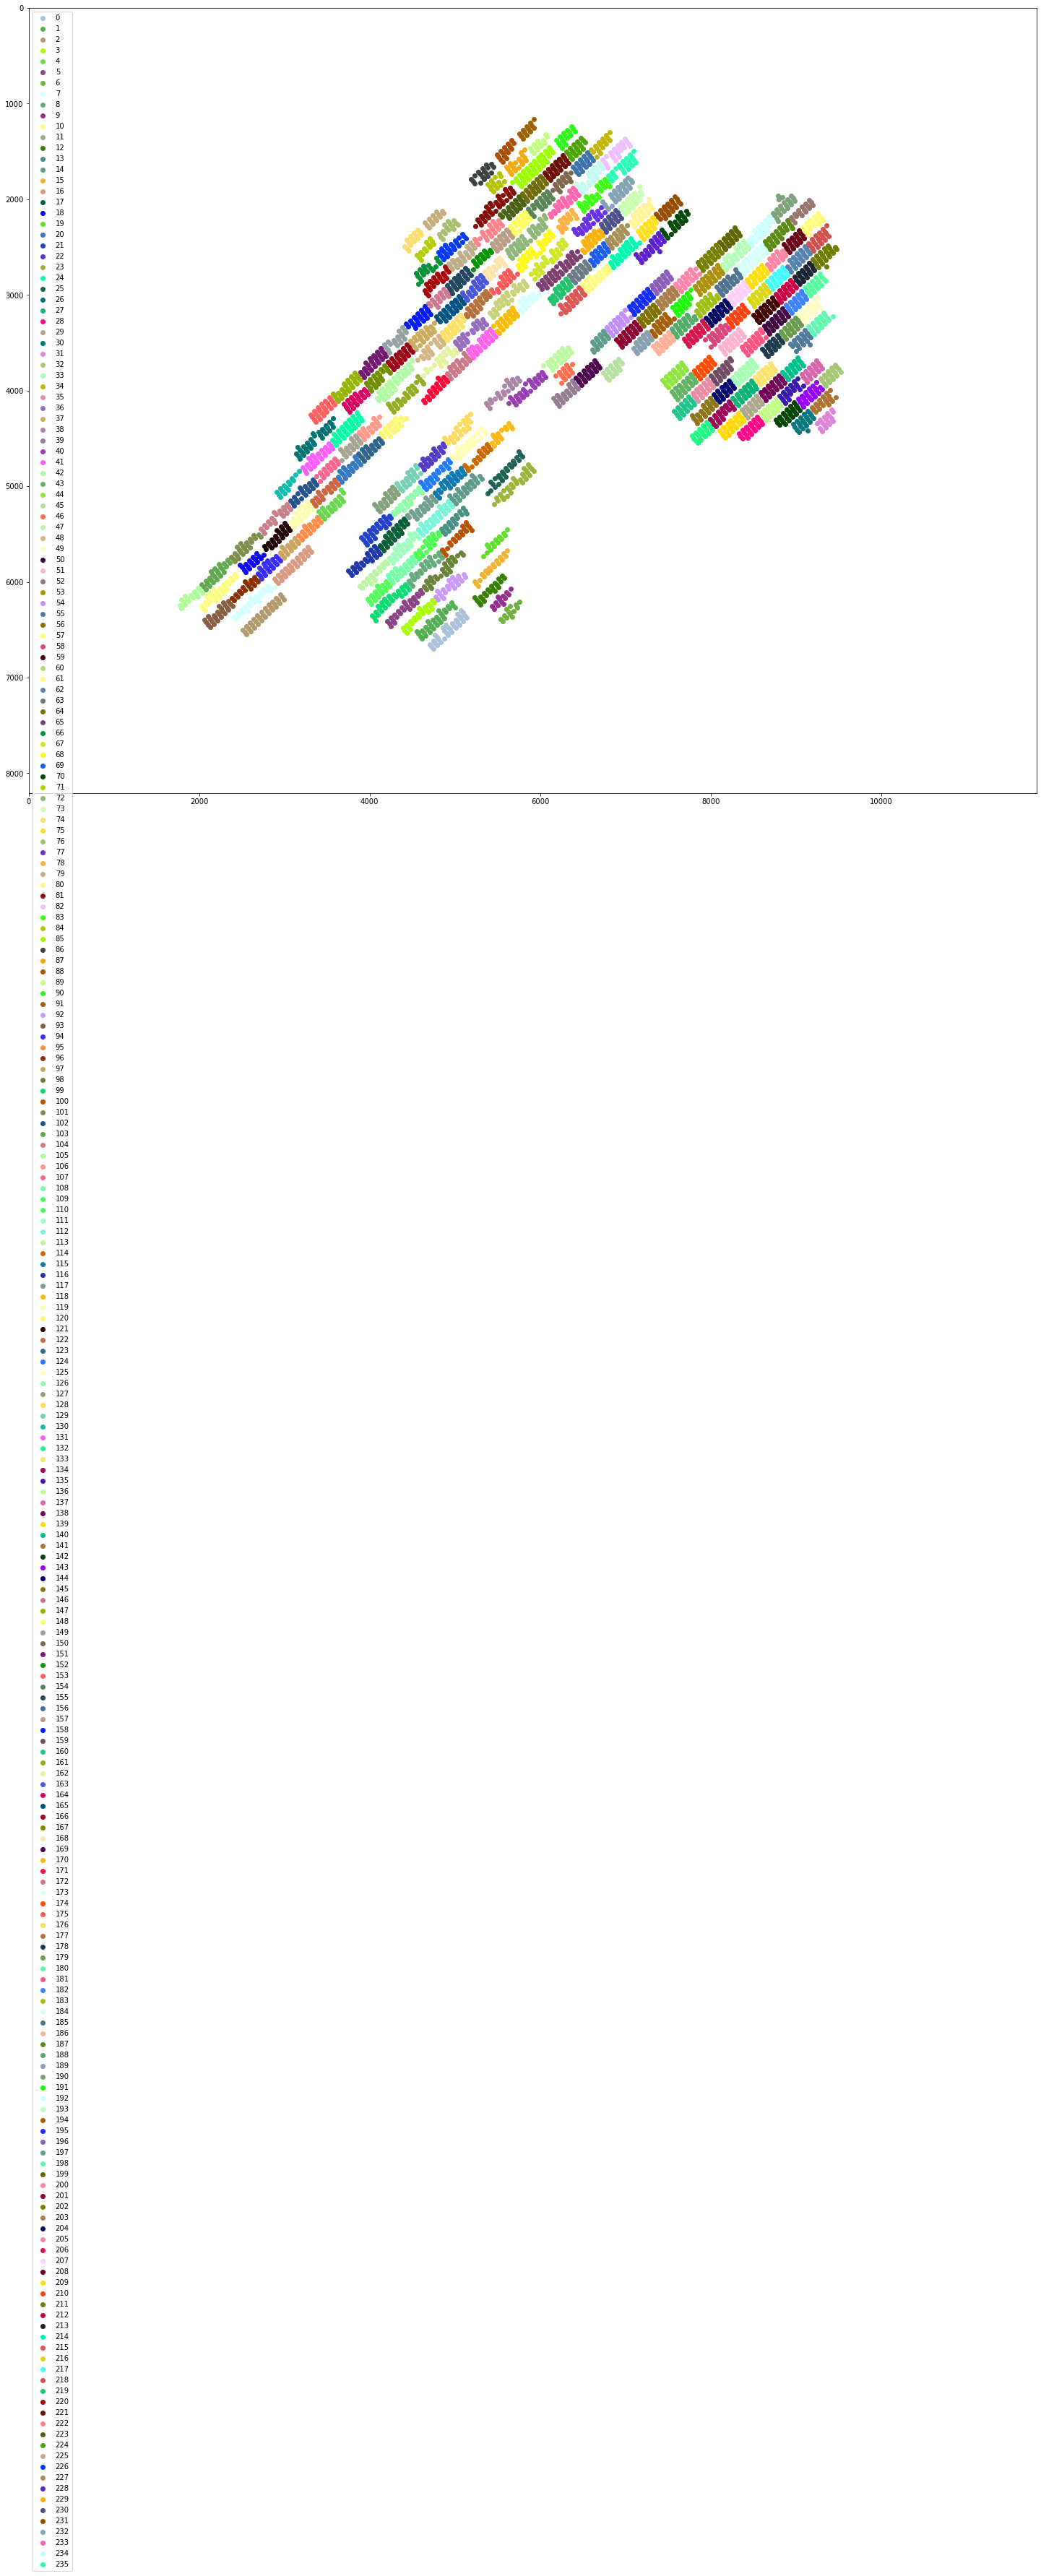

In [56]:
module_centers = np.array( [c.mean(axis=0) for c in true_module_contours] )
colors = list(matplotlib.colors.XKCD_COLORS.items())[:max(splitted_module_labels)+1]
fig, ax = plt.subplots(facecolor="w", figsize=(25,20))
for i in range(max(splitted_module_labels)+1):
    data = module_centers[splitted_module_labels == i]
    plt.scatter(data[:, 0], data[:, 1], color=colors[i][1], label=str(i))
ax.legend(loc='upper left')
ax.set_xlim([0, img_con.shape[1]])
ax.set_ylim([img_con.shape[0], 0])
plt.show() 

モジュールデータの出力

In [57]:
modules.extract_modules(img_org, output_dir_path)

In [58]:
import pickle
with open(output_dir_path+'/module_contours.pkl', 'wb') as pkl:
    pickle.dump(true_module_contours, pkl)
with open(output_dir_path+'/module_labels.pkl', 'wb') as pkl:
    pickle.dump(true_module_labels , pkl)    
with open(output_dir_path+'/module_labels_split.pkl', 'wb') as pkl:
    pickle.dump(splitted_module_labels , pkl)    